<a href="https://colab.research.google.com/github/kosuke-ttm/20240520/blob/main/241109_%E5%90%8D%E5%9F%8E%E5%A4%A7%E5%AD%A6mstudio_%E7%94%9F%E6%88%90AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 【1】全体概要

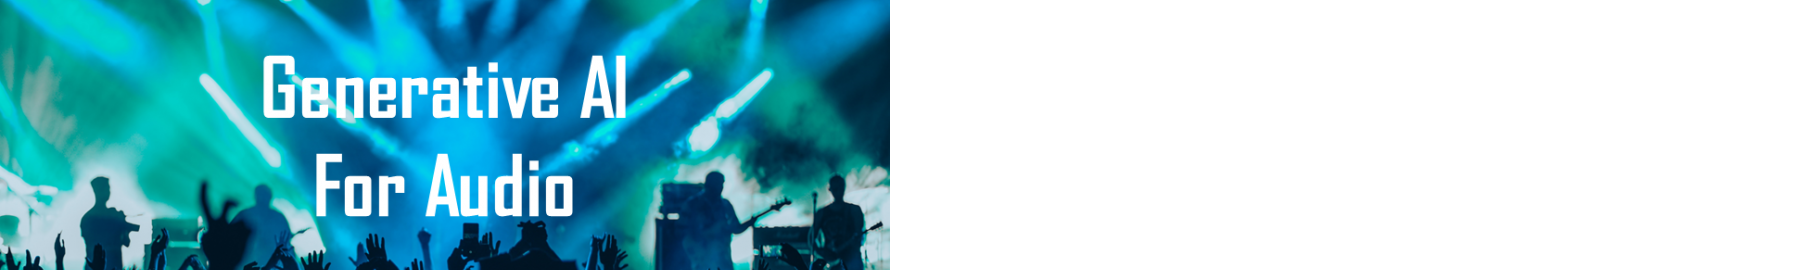

- 音声合成
    - VoiceVox
- 音楽生成
    - Suno AI
    - Magenta
- その他の生成AI
  - 画像生成
  - 動画生成
- 動画編集
  - Canva


## 【2】注意事項（必ず読むこと）

### 【2-1】免責事項

今回のコード、取り上げるサービスの成果物全てについて、本イベント以外（例えばSNSや商用等）で利用する際は、皆さんが各サービスの利用規約を確認の上、クレジット表記・禁止事項・著作権・影響等を考慮した上で皆さんの責任の元で使用してください。

名城大学社会連携センター、JellyWare株式会社は一切の責任を負いません。

### 【2-2】Colaboratoryについて

- 実行にはGoogleアカウント必要
- セクション
- 目次
- ドライブにコピー
- 編集画面になったら、他のセルをクリック
- 実行の目安時間🕑

### 【2-3】 本ページについて

- 本ページは参加者ご本人様限定です。ご本人様以外への共有はお控えください
- 🏈：ハンズオン
- 🚀：Advanced（早く進んでいる人向け）

## 【3】テスト🏈

- Colaboratoryが動くことの確認
- Discordへのファイル共有テスト

In [ ]:
#準備
!pip install gTTS

In [ ]:
#設定
text = 'ハンズオンの後半にAIで音楽生成します'


#実行
from gtts import gTTS
from google.colab import files
from IPython.display import Audio
tts = gTTS(text, lang='ja')
filename = f'{text[:80]}.wav'
tts.save(filename)
files.download(filename)
Audio(filename, autoplay=True)

## 【4】音声合成（VoiceVox）

先に時間のかかる4-2を実行

### 【4-1】VOICEVOXとは

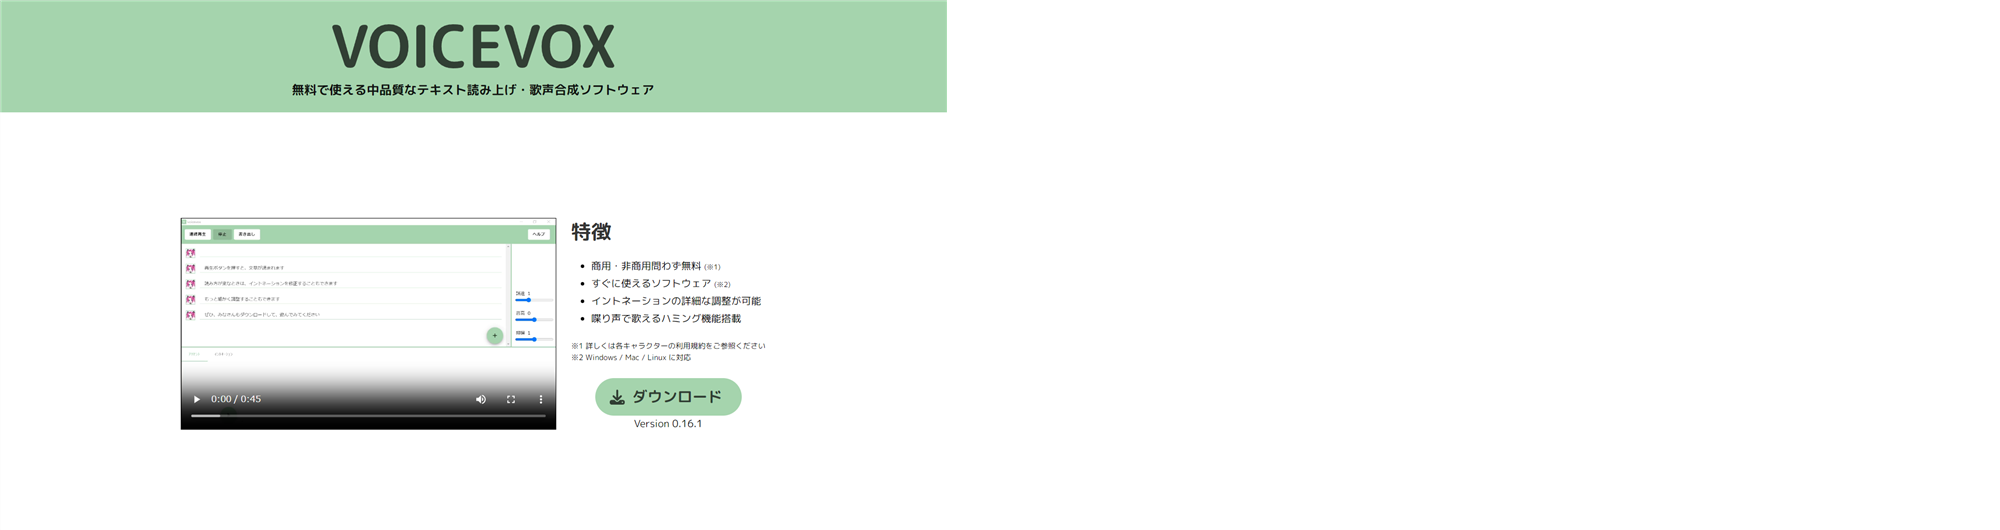

https://voicevox.hiroshiba.jp/

無料で使える中品質なテキスト読み上げ・歌声合成ソフトウェア

- 商用・非商用問わず無料 (各キャラクターの利用規約要参照)
- すぐに使えるソフトウェア (Windows / Mac / Linux に対応)
- イントネーションの詳細な調整が可能
- 喋り声で歌えるハミング機能搭載

### 【4-2】VOICEVOX（Python）🏈

In [ ]:
#準備 🕑1分程度
!curl -sSfL https://raw.githubusercontent.com/VOICEVOX/voicevox_core/8cf307df4412dc0db0b03c6957b83b032770c31a/scripts/downloads/download.sh | bash -s
%cd voicevox_core/
!wget https://github.com/VOICEVOX/voicevox_core/releases/download/0.14.1/voicevox_core-0.14.1+cpu-cp38-abi3-linux_x86_64.whl
!pip install voicevox_core-0.14.1+cpu-cp38-abi3-linux_x86_64.whl
!wget https://raw.githubusercontent.com/VOICEVOX/voicevox_core/406f6c41408836840b9a38489d0f670fb960f412/example/python/run.py

In [ ]:
#設定
text = 'クリエイティブな音声・楽曲・効果音を作ります'
speaker_id = 0


#実行 🕑11秒程度
%cd  /content/voicevox_core/
filename = f'../{text[:80]}_{speaker_id}.wav'
!python ./run.py --dict-dir "./open_jtalk_dic_utf_8-1.11" --text $text --out $filename --speaker-id $speaker_id
from google.colab import files
from IPython.display import Audio
files.download(filename)
Audio(filename, autoplay=True)

speaker_idについて

- `0`～`50`まで
- 詳細：https://monomonotech.jp/kurage/memo/230227_voicevox_colaboratory.html

###【4-3】演習🏈

🕑5分程度

VOICEVOX（Python）にて、`text` と `speaker_id` を変更して実行し、興味深いwavファイルをDiscordにシェア！

### 【4-4】VOICEVOX（PCアプリ）



機能

- 簡単GUI操作
- 調整機能
- ハミング機能


ハンズオンについて
- 講師が実行の様子を見せるので、インストール不要
- 🚀必要に応じて、後ほど各自で[ダウンロード](https://voicevox.hiroshiba.jp/)＆インストールせよ

## 【5】音楽生成（Suno AI）

### 【5-1】Suno AI🏈


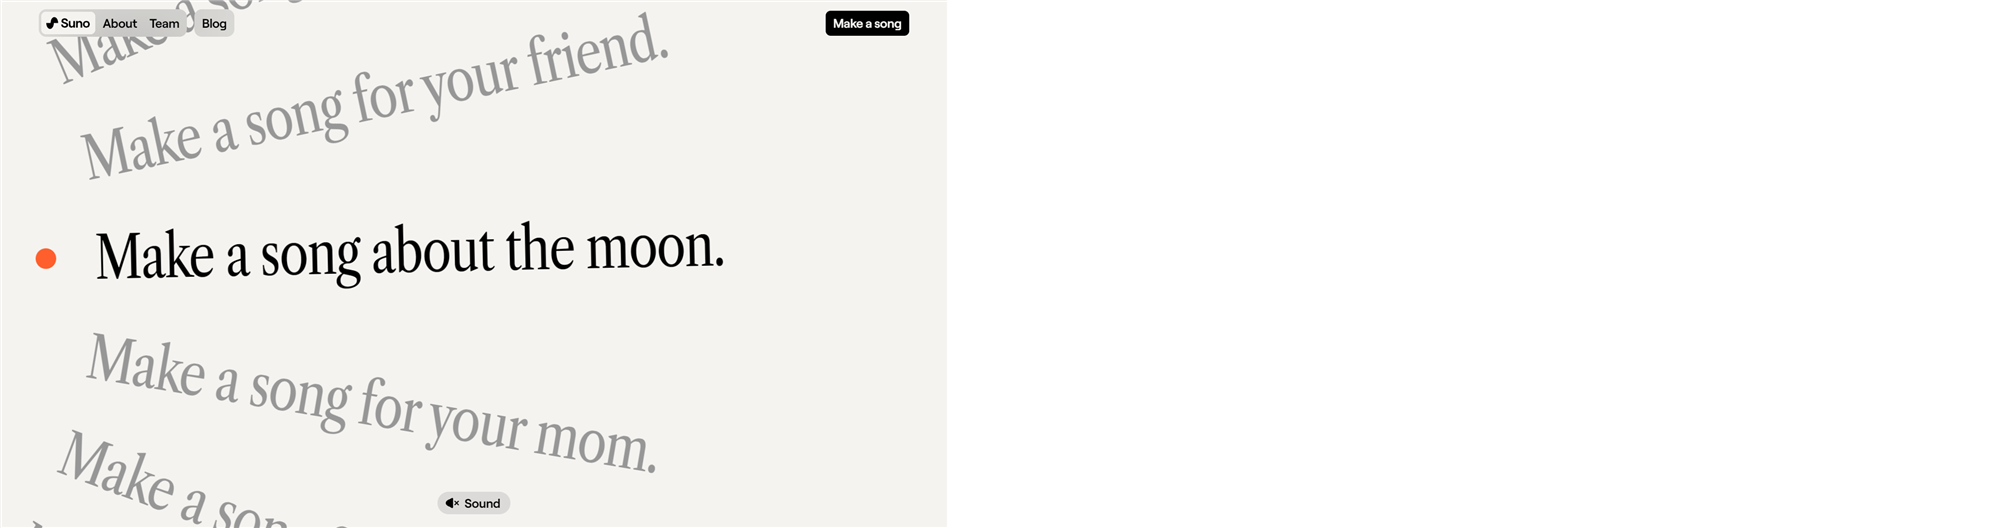


GUIで誰でも簡単に音楽生成できる

- Free Planあり：50クレジット/日、5クレジット/曲、2曲/1回実行、翌日復活
- 曲名とスタイルのみで生成可
- 歌詞の指定も可能
- 日本語歌詞にも対応

フリープランで作れるのは５回（10曲）だけなので注意

#### 【5-1-1】サインインの方法🏈

https://www.suno.ai/

`Create`をクリックして、Googleアカウントでサインインする例は以下の通り。もしチュートリアルが始まったら × で閉じて良い。

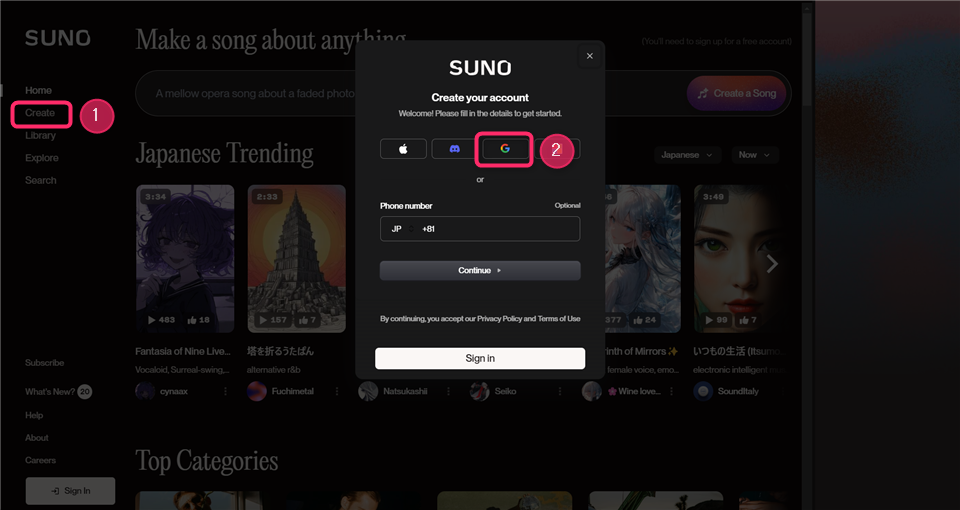

#### 【5-1-2】Custom時の警告🏈

「著作権を侵害しない歌詞であること」という意味なので、`I accept`を押して同意する。

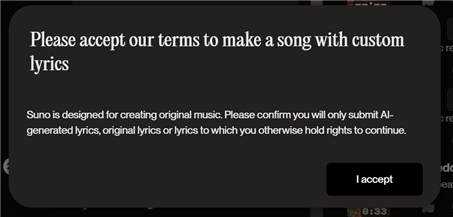

#### 【5-1-3】歌詞のヒント🏈

[ChatGPT](https://chatgpt.com/)に曲の歌詞を生成してもらう場合のプロンプト例

```
Pythonが勉強したくなる2分くらいの曲の歌詞を日本語で生成して。VerseやChorusなどは不要です。
```

```
Pythonが勉強したくなる曲の歌詞を日本語で生成して。メタタグは[Verse]、[Pre Chorus]、[Chorus]、[Bridge] 、[Chorus]、[Outro]を使って。
```

現状のSuno AIでの日本語歌詞のコツ

- 読み間違えそうな漢字はひらがなに
  - 操作⇒そうさ
- 英語はカタカナに
  - Python⇒パイソン


#### 【5-1-4】スタイルのヒント🏈

以下はほんの一例

```
j-pop
rock
funk
jazz
R&B
hiphop
ballad
acoustic
male
female
```

カンマ区切りで組合せ可能

```
jazz, female
```

```
j-pop, acoustic, male
```


#### 【5-1-5】シェアの方法🏈

リンクをシェアする方法：3点リーダー > `Share` > `Copy link`

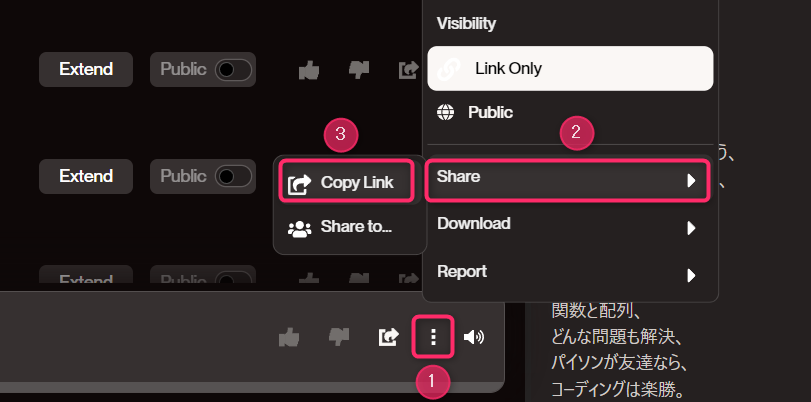

###【5-2】演習🏈

🕑5分程度

Suno AIで音楽を1回だけ生成してみよう

※残りの4回はミニハッカソンで作成することをお勧めする

### 【5-3】その他🚀

Suno AIに似た感じのサービス

- [Udio](https://www.udio.com/)：音質が良いが、生成にかかる時間は長め、Freeプランの曲数は少ない（例：２分の曲×2回 + 30秒の曲x1回）


## 【6】音楽生成（Magenta）

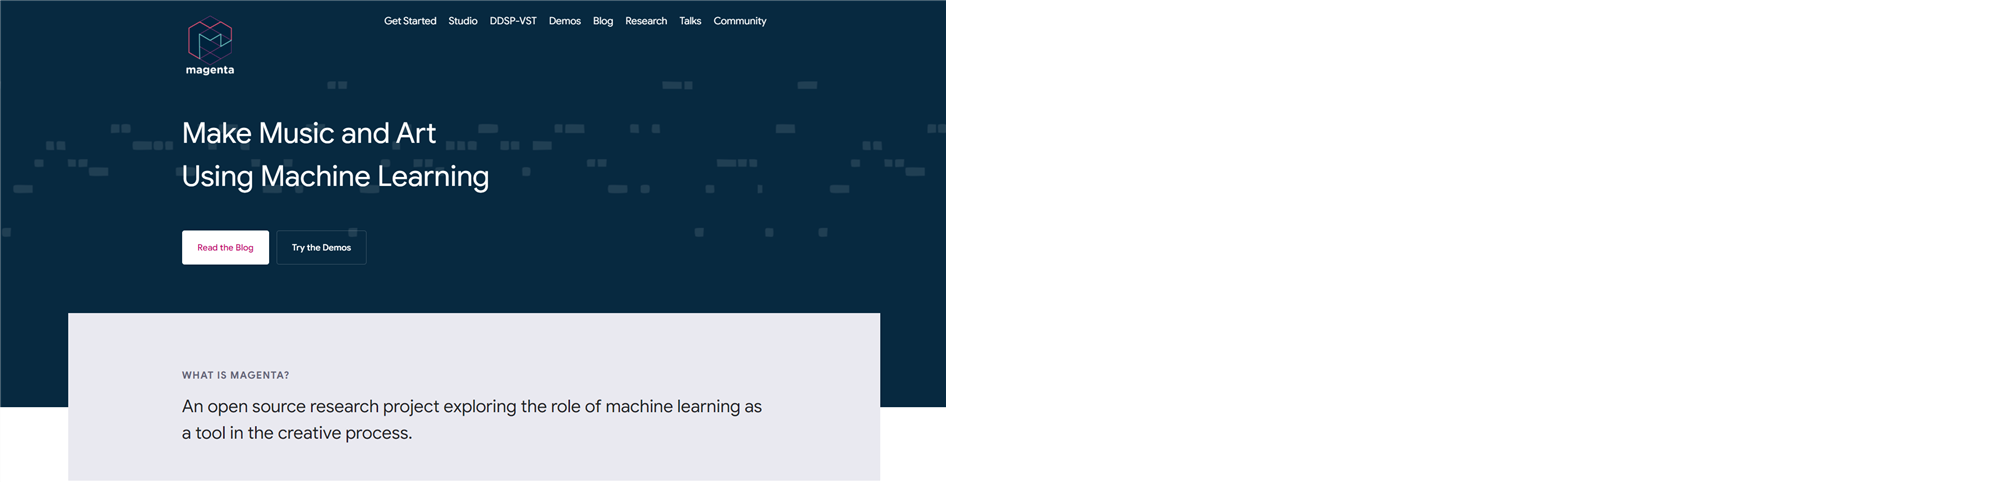

https://magenta.tensorflow.org/

機械学習を用いて音楽やアートを生み出せるか探求しているオープンソースの研究プロジェクト

- 様々なプロジェクトがあるが、今回取り扱うのがPerformance RNN
- 表現力豊かなピアノ演奏が特徴
- Yamaha e-Piano Competitionにてピアノ演奏されたMIDIデータを使って学習

#### Performance RNN🏈



⚠️注意点

- `セッションを再起動してください`は`キャンセル`

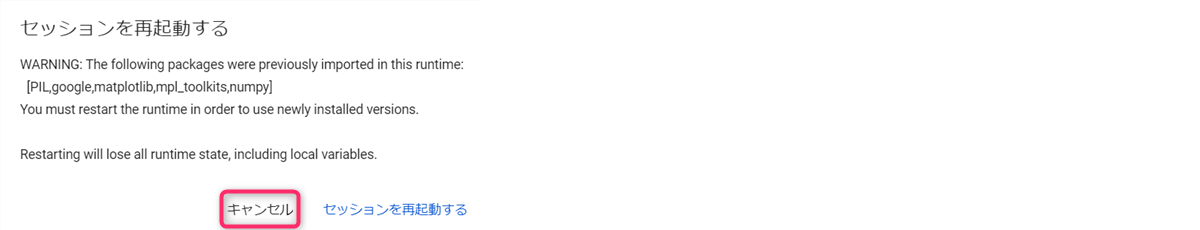

In [ ]:
#準備 🕑3分44秒程度
%cd  /content/
!git clone https://github.com/magenta/magenta.git
%cd magenta
!sed -i '/librosa ==/d' setup.py
!sed -i '/numba ==/d' setup.py
!sed -i "s/'python-rtmidi == 1.1.2',/'python-rtmidi == 1.5.8',/" setup.py
!pip install .
!apt install fluidsynth
!wget 'http://download.magenta.tensorflow.org/models/performance_with_dynamics.mag'
!sudo apt install sox

1. 準備が終わった人から「実行１」を実行して曲を作って聴いてみる（始まりの数秒は無音が多いので注意）
2. 聴いた印象から曲名をテキトーに想像
3. 「実行２」を実行して曲名を入力するとダウンロードされるので、Discordにアップロード

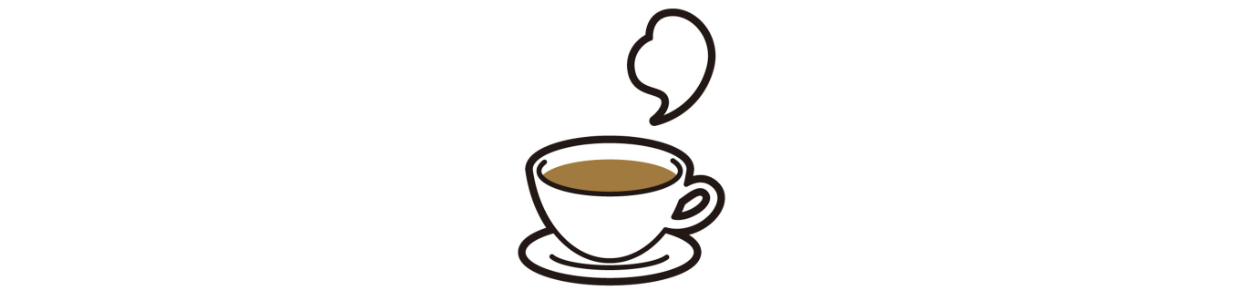

In [ ]:
#実行１ 🕑40秒程度

%cd  /content/magenta/

#モジュール読み込み
import glob
import os
from IPython.display import Audio

#AI作曲
!performance_rnn_generate \
--config='performance_with_dynamics' \
--bundle_file='performance_with_dynamics.mag' \
--output_dir='./' \
--num_outputs='1' \
--num_steps='6000'

#最後に作成されたMIDIファイルの名前を取得
files = glob.glob('*.mid')
file = max(files, key=os.path.getctime)
print(file)

#MIDI to WAV
!fluidsynth --fast-render='mymusic.wav' $file

#（非推奨）強制ボリュームアップ
!sox mymusic.wav output.wav vol 8.0

#WAV再生
Audio('output.wav', autoplay=True)

In [ ]:
# @title 実行２：曲名入力とダウンロード

# @markdown 曲名を記入した後に実行してください（曲名は直感でOK！）
songTitle = '' # @param {type:"string", placeholder:"曲名を80文字以内で記入"}

from google.colab import files
from pydub import AudioSegment

# songTitleが空の場合は実行を中止
if not songTitle:
    raise ValueError('曲名を記入してください')

# ファイル名は80文字制限
filename = f'{songTitle[:80]}.mp3'

# WAVファイルを読み込む
audio = AudioSegment.from_wav('output.wav')

# MP3形式で保存
audio.export(filename, format='mp3', bitrate='128k')

# ファイルをダウンロード
files.download(filename)

### しばらく経過した後のコード実行について

この後はしばらくコードを実行ない。一定時間操作がない場合、以下のような表示がでるので、`再接続`を選択すること。

再接続後の最初の実行は時間がかかるのでしばらく待つこと

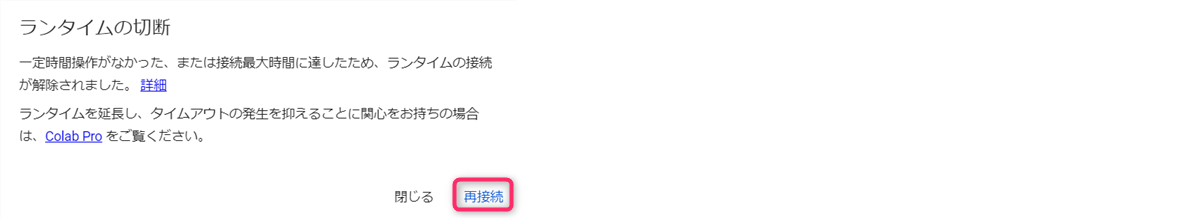

## 【7】画像生成

### 【7-1】FLUX.1🏈

https://huggingface.co/spaces/black-forest-labs/FLUX.1-schnell

- pro, dev, schnellの3種類
- 今回はschnell
- 制限不明
- 商用利用は要確認

### 【7-2】演習🏈


🕑5分程度

FLUX.1にて、画像を生成し、興味深い画像をDiscordにシェア！

💡右クリックでコピー、Discordに直接貼り付け可能

### 【7-3】その他🚀

- [Playground AI](https://playground.com/)：freeプラン 50枚/日、商用利用は要確認
- [Midjourney](https://www.midjourney.com/)：freeプラン 25回まで（復活しない）、商用利用不可

## 【8】動画生成🚀

- [Runway](https://runwayml.com/)：freeプラン 125クレジット/月、4秒動画=20クレジット。`Gen-2`のみ対応可能。
- [Dream Machine](https://lumalabs.ai/dream-machine)：freeプラン 1日10回（30回/月）。4秒動画。プロンプトを入力した後に`↑`アイコンをクリック
- [Kling](https://monomonotech.jp/kurage/memo/m240829_generative_ai_kling.html)：freeプラン 66クレジット/日、5秒動画=10クレジット。⚠️一番精度が高いが、生成に数時間～数十時間かかる場合あり。

生成されるまで結構な時間がかかるので注意。またfreeプランの制限は変動する場合あり。

Runwayの実行例

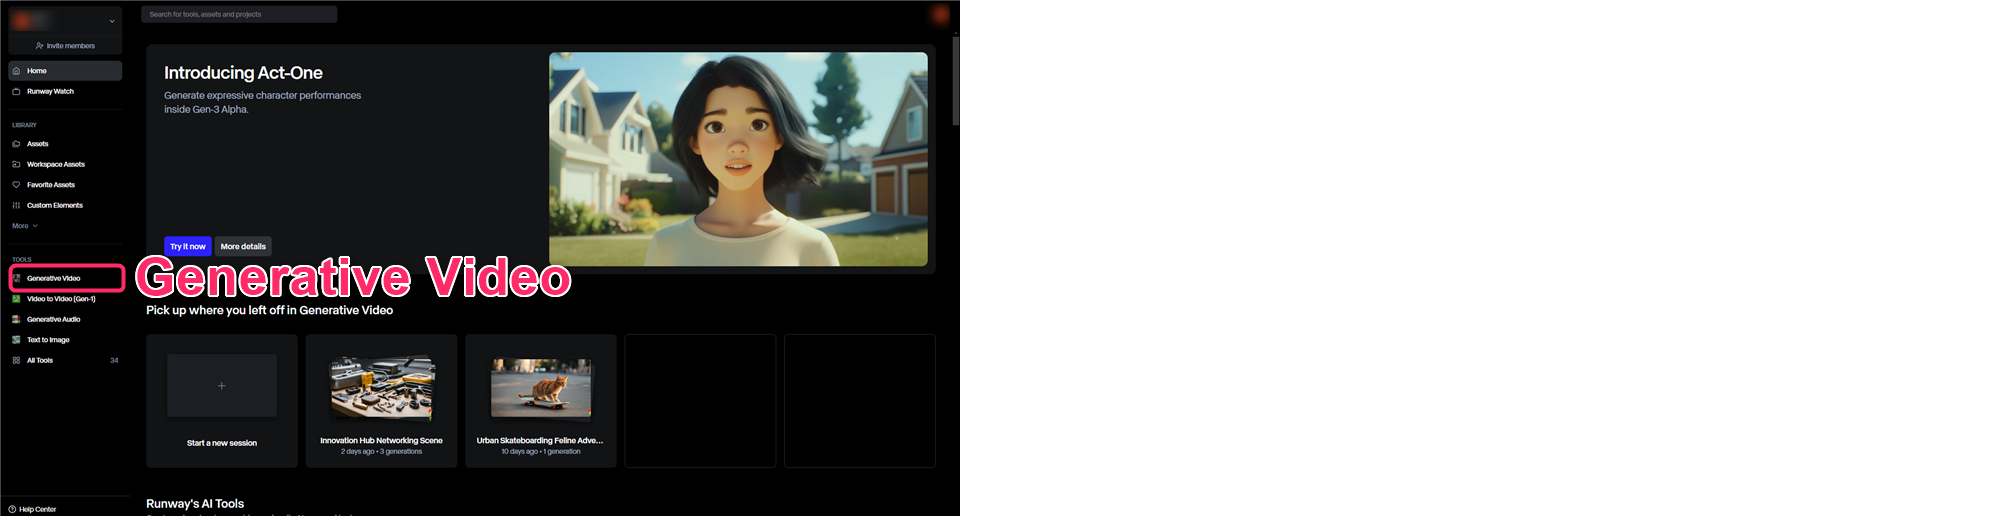

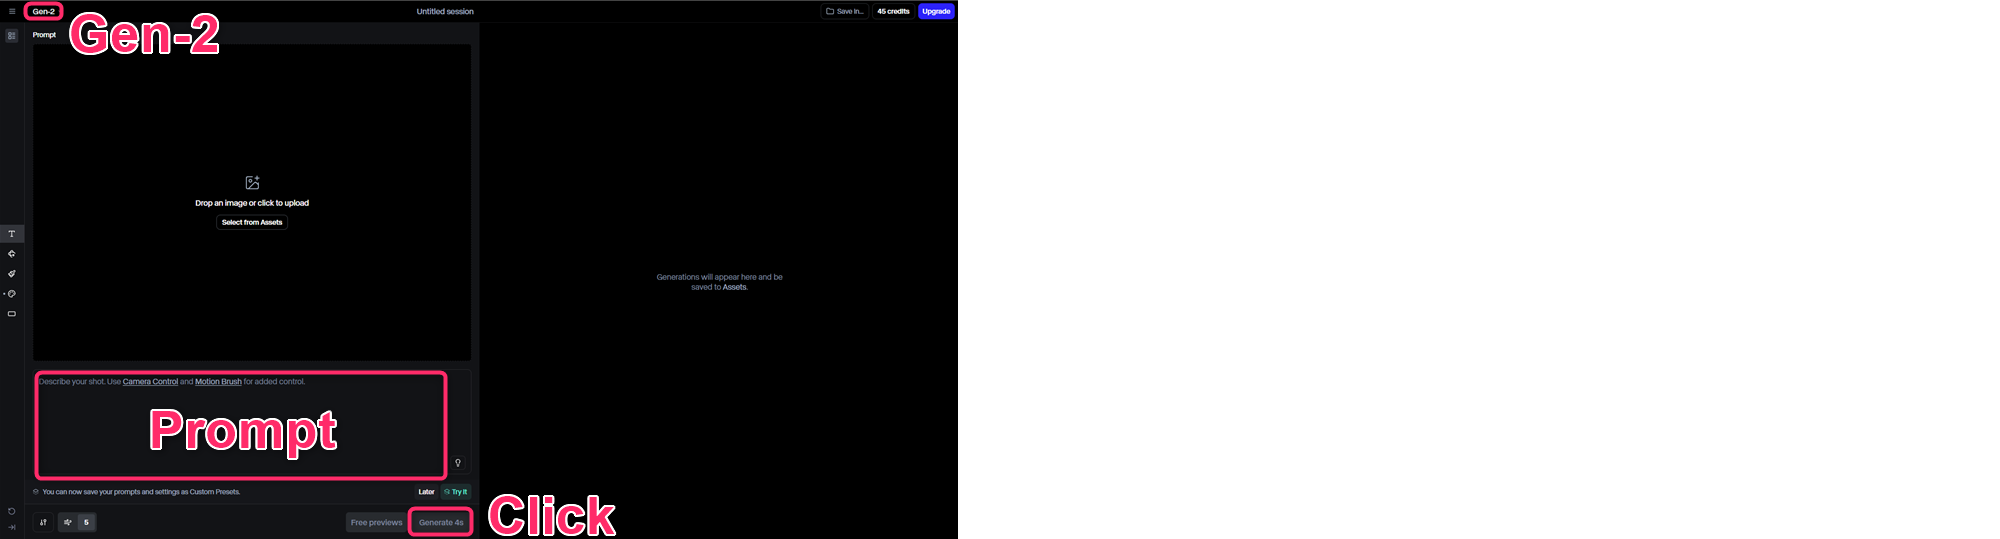

## 【9】動画編集

Canva

- ウェブ上で動画編集可能
- 動画閲覧の共有が簡単で、書き出しやアップロード不要


手順

- 初期登録：https://monomonotech.jp/kurage/memo/m241022_canva_signup.html
- 動画編集チュートリアル：https://monomonotech.jp/kurage/memo/m241022_canva_videocreation_tutorials.html


## 発表順番

In [ ]:
import random

N = 6
group = list(range(1, N+1))
random.shuffle(group)  # ランダムに並べ替え
print(group)